# FEATURE SCALING WITH SCIKIT-LEARN
Feature scaling is a method used to normalize the range of independent variables or features of data or X. In data processing, it is also known as data normalization and is generally performed during the data preprocessing.

1.Rescaling (min-max normalization)
2.Mean normalization
3.Standardization (Z-score Normalization)
4.Scaling to unit length

feature scaling that are implemented in scikit-learn:
1.StandardScaler
2.MinMaxScaler
3.RobustScaler
4.Normalizer

# Standard Scaler
The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})
df.head()

,x1,x2,x3
0,3.248691,4.632578,-14.657819
1,-1.223513,5.684509,-5.802131
2,-1.056344,3.943085,-9.161098
3,-2.145937,2.508340,-6.030558
4,1.730815,4.216731,0.131275


In [3]:
df.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,0.019545,5.028306,-5.073018
std,1.997672,3.003718,4.979994
min,-7.312880,-5.354209,-26.165824
25%,-1.325850,2.983117,-8.432691
50%,0.016908,5.056408,-5.087269
75%,1.343618,7.066050,-1.785300
max,8.053698,17.504353,13.298829


In [4]:
df.tail()

,x1,x2,x3
9995,0.145917,2.170375,-1.550878
9996,0.978204,7.346647,-2.235902
9997,-2.028288,12.225301,-5.419191
9998,-0.125392,7.648357,-11.417673
9999,-2.875740,4.701211,-3.288438


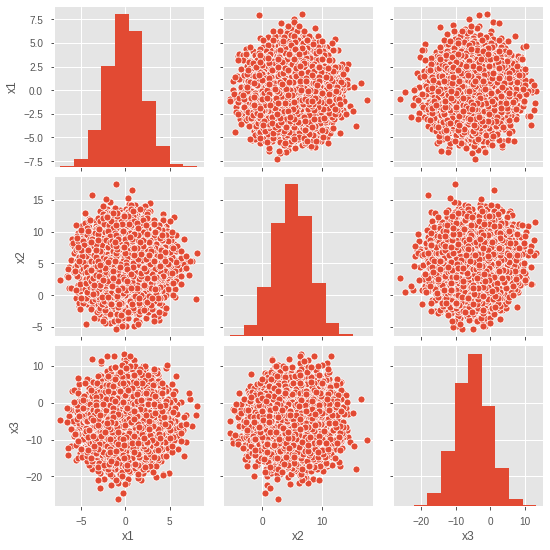

In [5]:
sns.pairplot(df)

In [6]:
pandas_profiling.ProfileReport(df)

In [7]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 1.61653543, -0.13175263, -1.9247574 ],
       [-0.62228462,  0.21847458, -0.14641572],
       [-0.53859835, -0.36131085, -0.82094159],
       ...,
       [-1.02516118,  2.39614871, -0.06951623],
       [-0.07255698,  0.87231272, -1.27409225],
       [-1.44940235, -0.10890221,  0.35836759]])

In [8]:
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

In [9]:
scaled_df.head()

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092


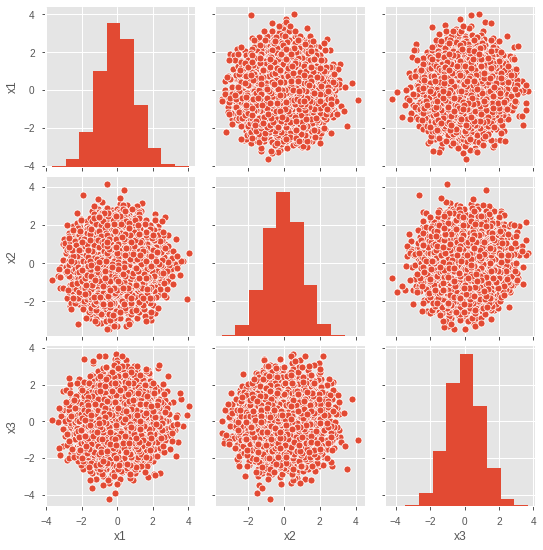

In [10]:
sns.pairplot(scaled_df,diag_kind='hist')

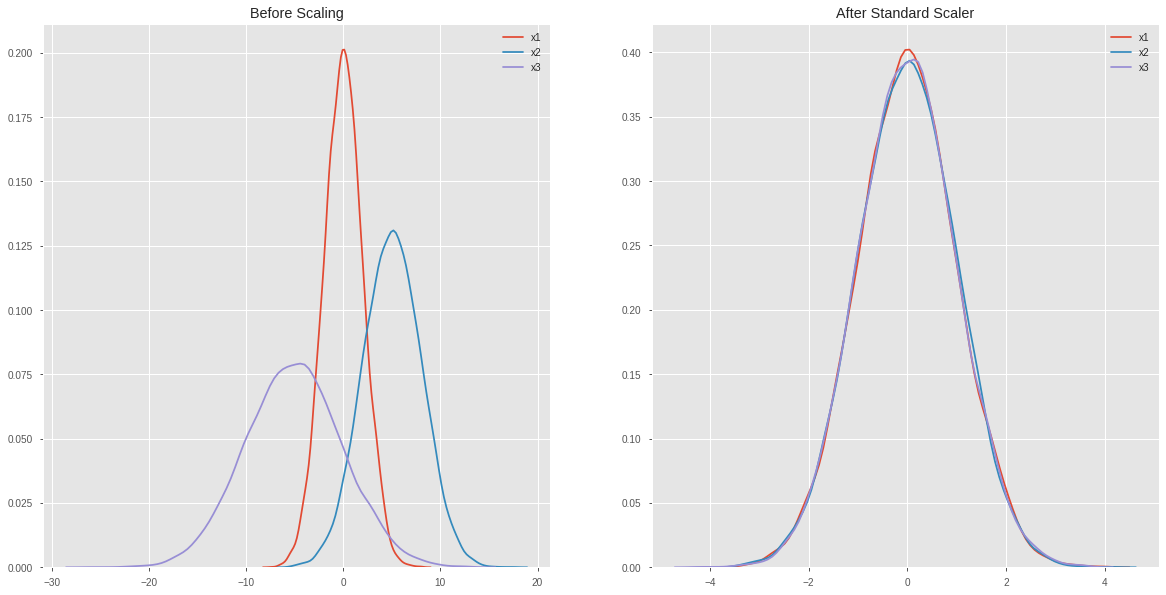

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)   # kernal density estimation
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

In [12]:
df = pd.DataFrame({
    # positive skew (Left Hist)
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})
df.head()

,x1,x2,x3
0,8.913396,33.282653,54.509849
1,5.583017,38.986294,52.473472
2,19.713205,26.377055,48.803613
3,23.293714,31.520740,50.593609
4,11.508381,38.646724,49.702286


In [13]:
pandas_profiling.ProfileReport(df)

In [14]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

In [15]:
scaled_df.head()

,x1,x2,x3
0,0.320592,0.776009,0.748636
1,0.184702,0.971903,0.645125
2,0.761260,0.538834,0.458583
3,0.907357,0.715496,0.549570
4,0.426476,0.960240,0.504263


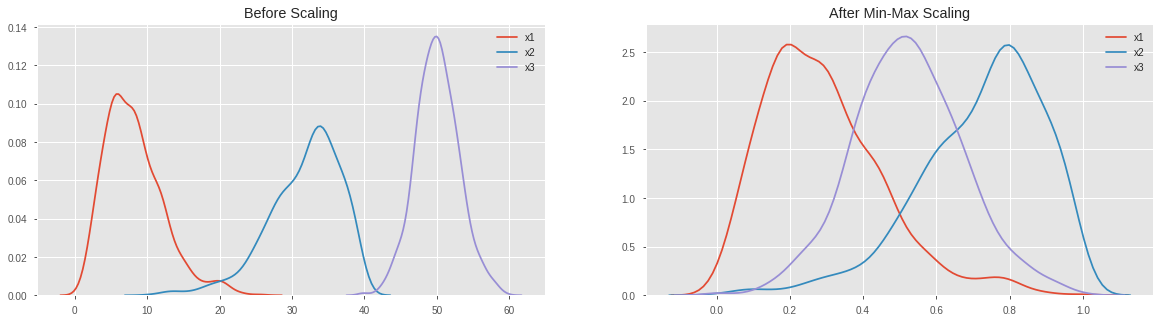

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

In [17]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})
x.head()

,x1,x2
0,21.289328,30.339567
1,20.475220,28.989049
2,20.472324,29.108980
3,17.862670,30.381639
4,20.554138,28.639373


In [18]:
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

In [19]:
robust_scaled_df.head()

,x1,x2
0,0.946526,0.203267
1,0.319729,-0.692477
2,0.317499,-0.612932
3,-1.691723,0.231172
4,0.380490,-0.924403


In [20]:
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

In [21]:

minmax_scaled_df.head()

,x1,x2
0,0.922261,0.125539
1,0.888763,0.069703
2,0.888644,0.074662
3,0.781266,0.127279
4,0.892010,0.055246


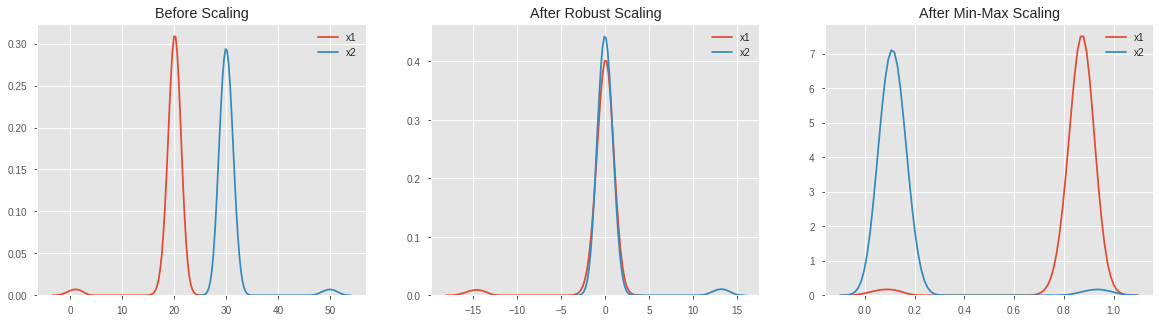

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

In [23]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

df.head()

,x1,y1,z1
0,-7.0,-68.0,67.0
1,64.0,-5.0,-82.0
2,-99.0,62.0,8.0
3,58.0,32.0,-26.0
4,50.0,9.0,123.0


In [24]:

df.tail()

,x1,y1,z1
995,59.0,-69.0,15.0
996,-99.0,0.0,21.0
997,88.0,20.0,103.0
998,-58.0,-68.0,-40.0
999,-94.0,-22.0,107.0


In [25]:
scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

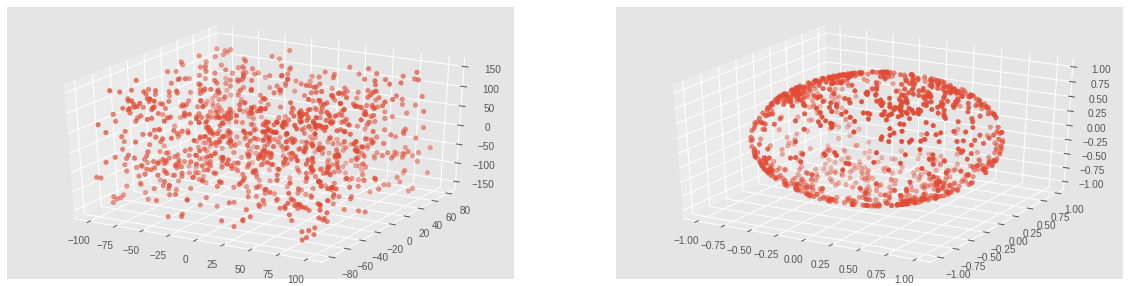

In [26]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

# Non-linear transformation¶
Def: A nonlinear transformation changes (increases or decreases) linear relationships between variables and, thus, changes the correlation between variables.

Examples of nonlinear transformation of variable x would be taking the
    #Square root x or
    #The reciprocal of x.
Non Linear Transformation has been Divved into two types of transformations are available:
#Quantile Transformation
 1.Uniform 
 2.Normal
#Power Transformation(Gaussian)
 1.Power Transofmation(Box Cox)
 2.Power Transformation(Yeo-Johnson)

# Quantile Transformation(Uniform):
It is non-parmatric transformation to map the data to uniform distribution with values of 0 and 1

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [28]:
X,Y = load_iris(return_X_y=True)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=0)

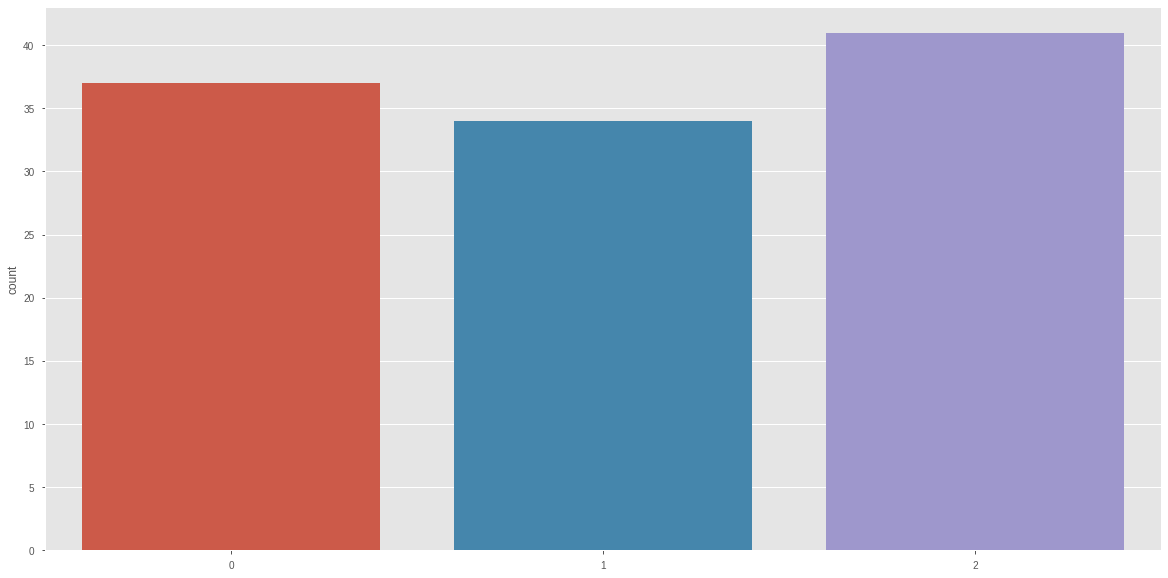

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(y_train)
plt.show()

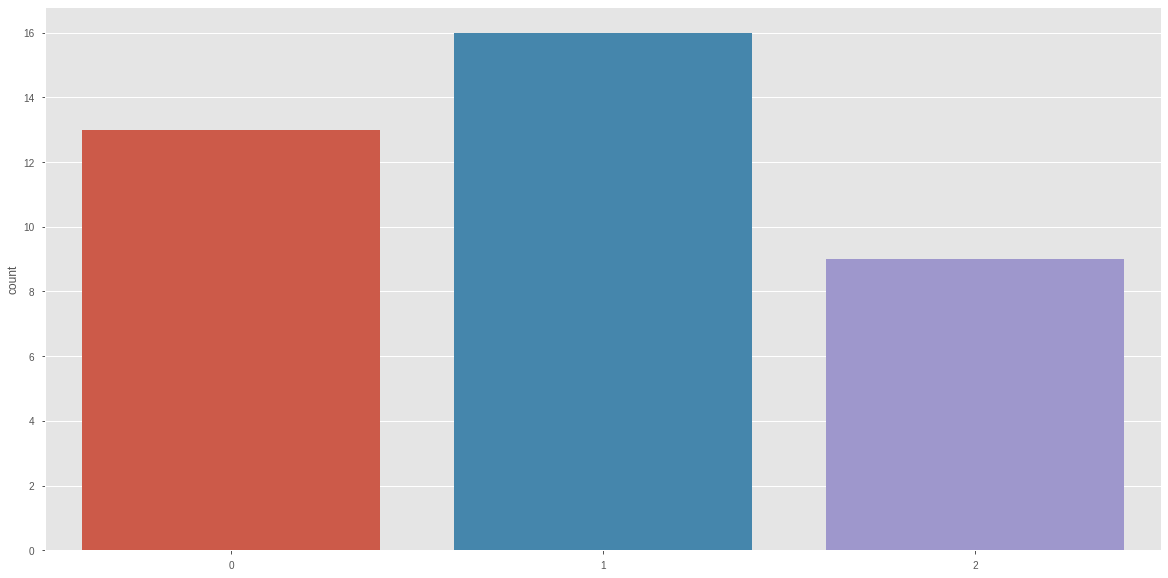

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(y_test)

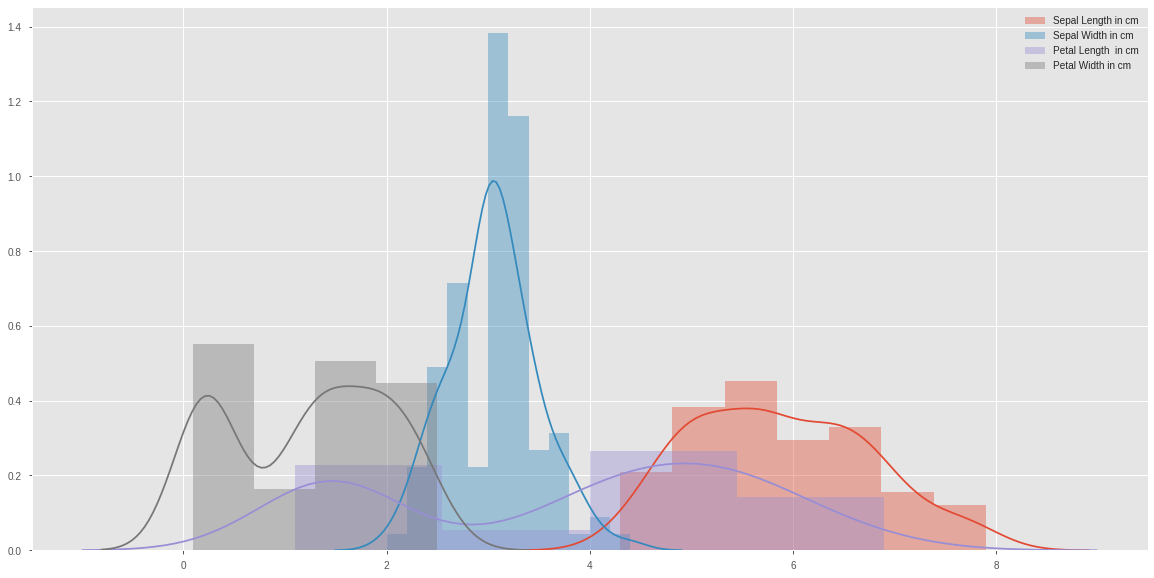

In [32]:
plt.figure(figsize=(20,10))
sns.distplot(X_train[:,0],kde=True,label="Sepal Length in cm")  # Sepal Length
sns.distplot(X_train[:,1],kde=True,label="Sepal Width in cm")  # Sepal Width
sns.distplot(X_train[:,2],kde=True,label="Petal Length  in cm")  # Petal Length
sns.distplot(X_train[:,3],kde=True,label="Petal Width in cm")  # Petal Width
plt.legend()

Text(0, 0.5, 'Sepal width')

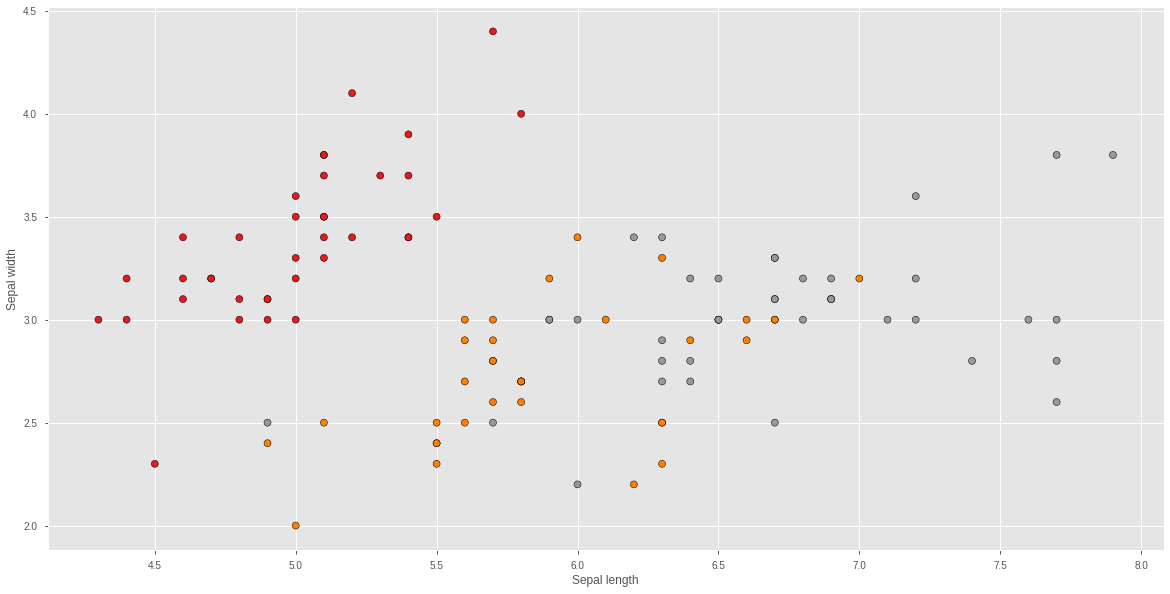

In [33]:
# Plot the training points
plt.figure(figsize=(20,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'petal width')

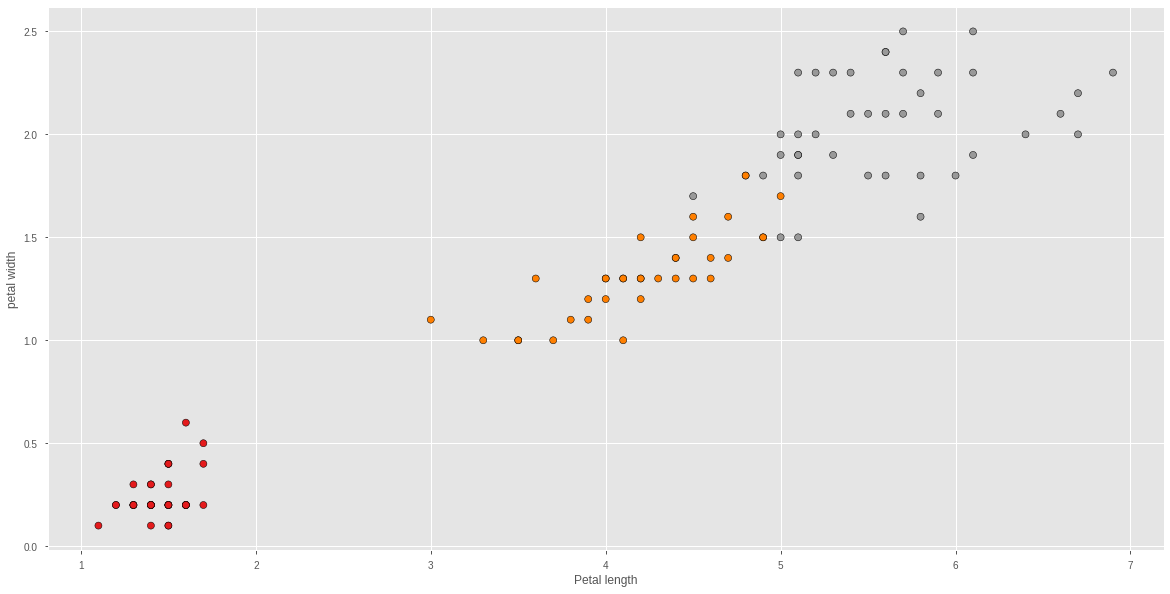

In [34]:
# Plot the training points
plt.figure(figsize=(20,10))
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('petal width')

In [35]:

X_train.shape

(112, 4)

In [36]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100) # By Default we Uniform 
X_train_transformer = quantile_transformer.fit_transform(X_train)
X_test_transformer = quantile_transformer.transform(X_test)

# Trained Data Sepal Length Before Transformation

In [37]:
np.percentile(X_train[:, 0],[0,25,50,75,100]) # Sepal Length Original Data

array([4.3, 5.1, 5.8, 6.5, 7.9])

# Tested Data Sepal Length Before Transformation

In [38]:
np.percentile(X_test[:,0],[0,25,50,75,100])

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

# Trained Data Sepal Length After Transformation

In [39]:
np.percentile(X_train_transformer[:, 0],[0,25,50,75,100]) # Sepal Length Original Data  # 0 To 1

array([0.        , 0.23737374, 0.51010101, 0.74242424, 1.        ])

# Trained Data Sepal Length After Transformation

In [40]:
np.percentile(X_test_transformer[:,0],[0,25,50,75,100])

array([0.01010101, 0.24873737, 0.47979798, 0.6031941 , 0.94144144])

# Quantile Transformation(Normal):

In [41]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100,output_distribution='normal') # By Default we Uniform 
X_train_transformer = quantile_transformer.fit_transform(X_train)
X_test_transformer = quantile_transformer.transform(X_test)

In [42]:

np.percentile(X_train[:, 0], [0, 25, 50, 75, 100])

array([4.3, 5.1, 5.8, 6.5, 7.9])

In [43]:
np.percentile(X_train_transformer[:, 0], [0, 25, 50, 75, 100])

array([-5.19933758, -0.71477599,  0.02532218,  0.65083731,  5.19933758])

# Power Transformation:
Def: Power transforms are a family of parametric, monotonic transformations that aim to map data from any distribution to as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness.

In [44]:
PT_Johnson = preprocessing.PowerTransformer() # By Default we have this method yeo-johnson

In [45]:
PT_Johnson.method

'yeo-johnson'

In [46]:
PT_Box_cox = preprocessing.PowerTransformer(method="box-cox") # I am Changing my Method from johson to box-cox

In [47]:
PT_Box_cox.method

'box-cox'

In [48]:
rng = np.random.RandomState(304)

In [49]:
# n_quantiles is set to the training set size rather than the default value
QT_normal = preprocessing.QuantileTransformer(n_quantiles=500,
                                             output_distribution='normal',
                                             random_state=rng)

In [50]:
QT_normal.n_quantiles

500

In [51]:
N_SAMPLES = 1000
FONT_SIZE = 8
BINS = 30

In [52]:
size = (N_SAMPLES,1)

In [53]:
X_lognormal  = rng.lognormal(size=size)  # lognormal distribution

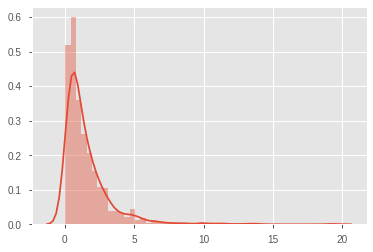

In [54]:
sns.distplot(X_lognormal)

In [55]:
df = 3 
X_chisq  = rng.chisquare(df=df,size=size)  # Chisquare distribution

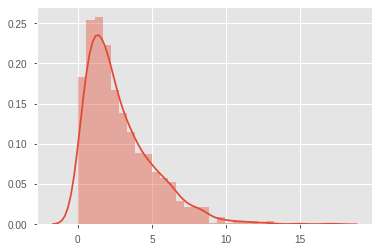

In [56]:
sns.distplot(X_chisq)

In [57]:
a = 50
X_weibull  = rng.weibull(a=a,size=size)  # weibull distribution

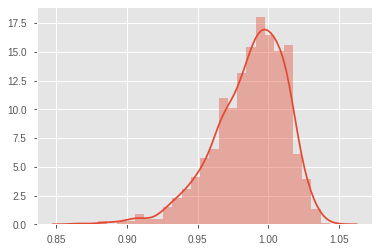

In [58]:
sns.distplot(X_weibull)

In [59]:
# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

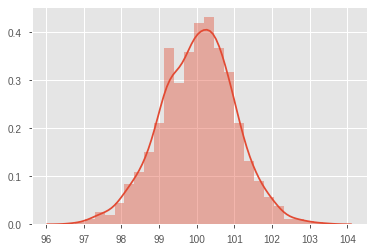

In [60]:
sns.distplot(X_gaussian)

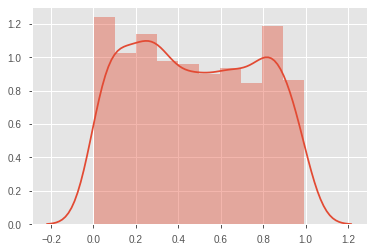

In [61]:
# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)
sns.distplot(X_uniform)

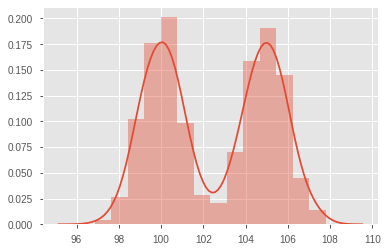

In [62]:
# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)
sns.distplot(X_bimodal)

In [63]:
# create plots
distributions = [
    ('Lognormal', X_lognormal),
    ('Chi-squared', X_chisq),
    ('Weibull', X_weibull),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Bimodal', X_bimodal)
]

colors = ['#D81B60', '#0188FF', '#FFC107',
          '#B7A2FF', '#000000', '#2EC5AC']

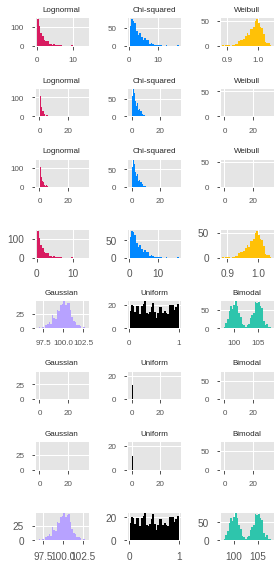

In [64]:
fig,axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [(0, 3, 6, 9), (1, 4, 7, 10), (2, 5, 8, 11), (12, 15, 18, 21),
             (13, 16, 19, 22), (14, 17, 20, 23)]
axes_list = [(axes[i], axes[j], axes[k], axes[l])
             for (i, j, k, l) in axes_idxs]



for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=.5)
    
    
    # perform power transforms  PT_Box_cox,PT_Johnson,QT_normal
    X_trans_bc = PT_Box_cox.fit(X_train).transform(X_test)
    lmbda_bc = round(PT_Box_cox.lambdas_[0], 2)
   
    X_trans_yj = PT_Johnson.fit(X_train).transform(X_test)
    lmbda_yj = round(PT_Johnson.lambdas_[0], 2)
    
    # perform quantile transform
    X_trans_qt = QT_normal.fit(X_train).transform(X_test)
    
    
    
    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
    
    for ax,X_trans,meth_name, lmbda  in zip((ax_bc, ax_yj, ax_qt),   (X_trans_bc,X_trans_yj,X_trans_qt),('Box-Cox', 'Yeo-Johnson', 'Quantile transform'),   (lmbda_bc,lmbda_yj,None)
    ):
      ax.hist(X_train, color=color, bins=BINS)
      title = "After {}".format(meth_name)
      if lmbda is not None:
        title += r'\n$\lambda$ = {}'.format(lmbda)
        ax.set_title(name, fontsize=FONT_SIZE)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
        ax.set_xlim([-3.5,35])
plt.tight_layout()
plt.show()
